# Exercise Analysis : Sales



In [24]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
from itertools import combinations 
from collections import Counter


#### Reading  all datasets and turning them into 1 data frame

In [2]:
sales_monthly = [sales for sales in os.listdir("./Data/")]
sales_year = pd.DataFrame()
for sales in sales_monthly:
    sales_df = pd.read_csv("./Data/"+sales)
    sales_year = pd.concat([sales_year, sales_df])
sales_year.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Exporting the whole dataframe into one CSV file

In [3]:
sales_year.to_csv("yearly_sales.csv", index=False)

### Cleaning NAN/Null values

In [4]:
sales_year.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
sales_year = sales_year.dropna(how='all')

In [6]:
sales_year = sales_year[sales_year['Order Date'].str[0:2]!='Or']
sales_year

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Adding necessary columns for further analysis


#### Adding month column

In [7]:
sales_year["Month"]= sales_year['Order Date'].str[0:2]
sales_year["Month"] = sales_year["Month"].astype("int32")

In [8]:
sales_year["Quantity Ordered"]=sales_year["Quantity Ordered"].astype("float") 
sales_year["Price Each"]=sales_year["Price Each"].astype("float") 

In [28]:
sales_year["Sales"] = sales_year["Quantity Ordered"] * sales_year["Price Each"]
sales_year.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Adding city column

In [ ]:
sales_year["City"] = sales_year["Purchase Address"].apply(lambda x : x.split(',')[1]+" , "+x.split(',')[2].split(' ')[1])
sales_year.head()

# Analysis

##### Highest sales : Monthly

In [ ]:
sales_value = sales_year.groupby('Month').sum()
sales_value

In [ ]:
months = range(1,13)
plt.bar(months,sales_value['Sales'])
plt.xticks(months)
plt.ylabel('Sales in $ US Dollars')
plt.xlabel('Months in # Number ')
plt.show()

##### Highest Sales : City 

In [ ]:
sales_city = sales_year.groupby('City').sum()
sales_city

In [ ]:
cities = [city for city, df in sales_year.groupby('City')]
plt.bar(cities,sales_city['Sales'])
plt.xticks(cities, rotation= 'vertical')
plt.ylabel('Sales in $ US Dollars')
plt.xlabel('Cities in US ')
plt.show()

##### Time Analysis : Best time to display advertisments

In [ ]:
sales_year['Order Date'] = pd.to_datetime(sales_year['Order Date'])
sales_year.head()

In [ ]:
sales_year['Hour'] = sales_year['Order Date'].dt.hour
sales_year['Minute'] = sales_year['Order Date'].dt.minute


In [ ]:
hours = [hour for hour, df in sales_year.groupby('Hour')]
plt.plot(hours,sales_year.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Combi-products

In [21]:
combi_products = sales_year[sales_year['Order ID'].duplicated(keep=False)]
combi_products['Package'] = combi_products.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
combi_products.head()

C:\Users\Ellay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Package
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [22]:
combi_products = combi_products[['Order ID','Package']].drop_duplicates()
combi_products.head()

,Order ID,Package
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
count = Counter()
for row in combi_products['Package']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [26]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [27]:
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Product : Sold the most

In [29]:
sales_year.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [31]:
product_sales = sales_year.groupby('Product')
quantity = product_sales.sum()['Quantity Ordered']

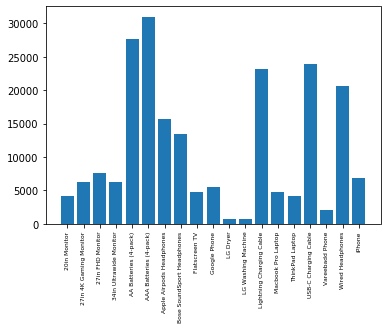

In [37]:
products = [product for product, combi_products in product_sales]
plt.bar(products, quantity)
plt.xticks(products,rotation='vertical',size=6)
plt.show()

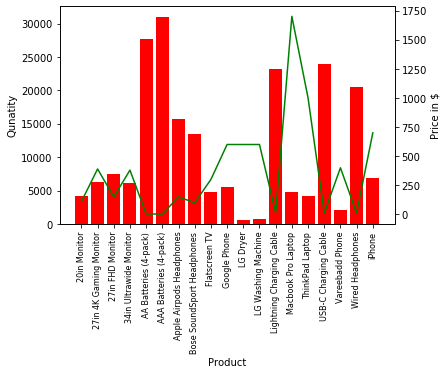

In [43]:
prices = sales_year.groupby('Product').mean()['Price Each']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity,color ='r')
ax2.plot(products,prices,'g')
ax1.set_xlabel('Product')
ax1.set_ylabel('Qunatity')
ax2.set_ylabel('Price in $')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()
